In [2]:
! pip install "matplotlib==3.8.3"
! pip install setuptools
! pip install "librosa==0.9.1"
! pip install pandas
! pip install keras
! pip install tensorflow
! pip install numpy

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.5 kB 487.6 kB/s eta 0:00:01
     ------------------------------ ------- 133.1/165.5 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 1.2 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 5.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.6 MB 7.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/7.6 MB 8.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/7.6 MB 10.1 MB/s eta 0:00:01
   ---------- ------------------------

In [3]:
# import the most useful packages
import numpy as np
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
import librosa
import librosa.display

finished importing


In [136]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

def remove_silence(input_file, output_file, min_silence_len=500, silence_thresh=-40):
    audio = AudioSegment.from_mp3(input_file)

    chunks = split_on_silence(audio, min_silence_len=min_silence_len, silence_thresh=silence_thresh)
    if(len(chunks) == 0):
        chunks = split_on_silence(audio, min_silence_len=min_silence_len, silence_thresh=silence_thresh+10)

    output = AudioSegment.empty()
    for chunk in chunks:
        output += chunk

    output.export(output_file, format="mp3")

# **Different Sound Representations for Sample Files**

In [137]:
# Get audio
file1 = 'recordings/stageI/141/a1.mp3'
file1_preprocessed = 'recordings/stageI/141/a1_preprocessed.mp3'
remove_silence(file1, file1_preprocessed)
audio1, sample_rate1 = librosa.core.load(file1_preprocessed)
file2 = 'recordings/stageI/8/a0.mp3'
file2_preprocessed = 'recordings/stageI/8/a0_preprocessed.mp3'
remove_silence(file2, file2_preprocessed)
audio2, sample_rate2 = librosa.core.load(file2_preprocessed)
file3 = 'recordings/stageI/8/a2.mp3'
audio3, sample_rate3 = librosa.core.load(file3)
file4 = 'recordings/stageI/8/a3.mp3'
audio4, sample_rate4 = librosa.core.load(file4)



(1025, 70)


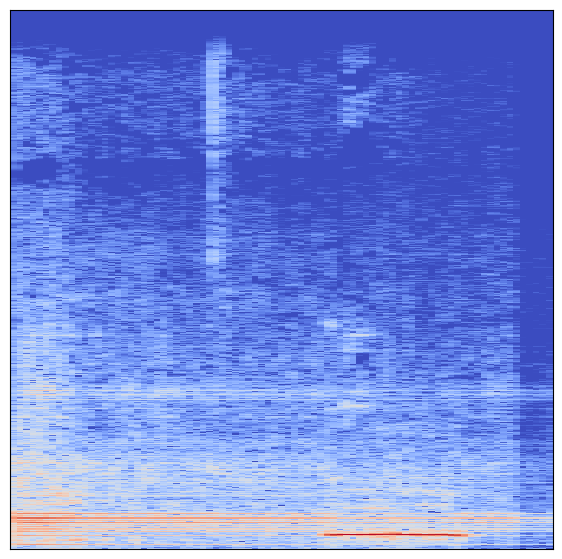

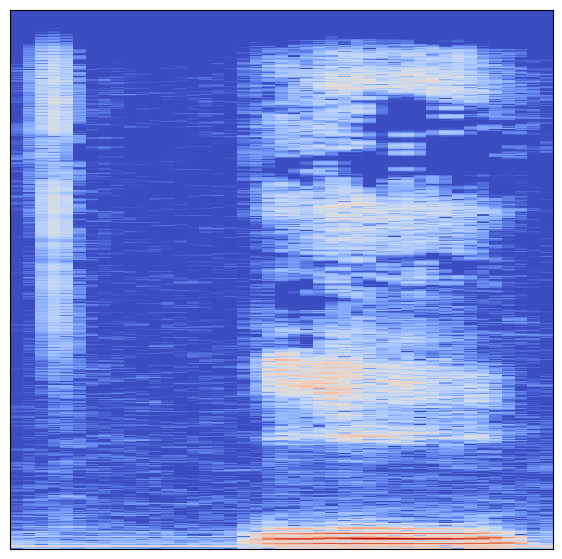

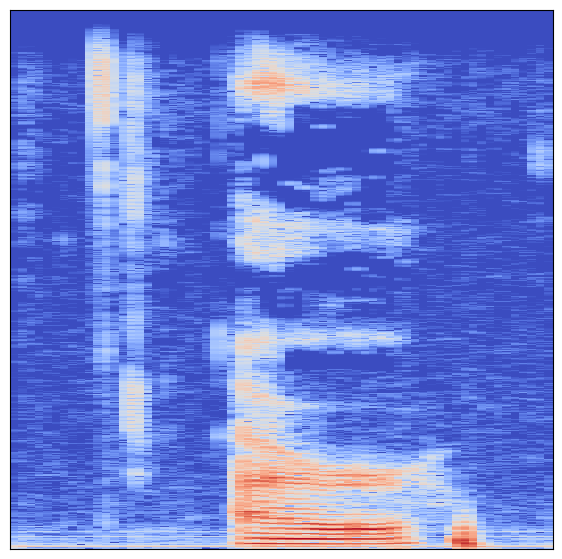

<Figure size 700x700 with 0 Axes>

In [109]:
# spectrograms
X = librosa.stft(audio1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)

X2 = librosa.stft(audio2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb2)

X3 = librosa.stft(audio3)
Xdb3 = librosa.amplitude_to_db(abs(X3))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb3)

X4 = librosa.stft(audio4)
Xdb4 = librosa.amplitude_to_db(abs(X4))
plt.figure(figsize=(7,7))
print(Xdb4.shape)
# librosa.display.specshow(Xdb4)

C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_2248\248094261.py:4: FutureWarning: Pass y=[-0.0021597  -0.00516344 -0.0047384  ...  0.01164483  0.01614557
  0.01836604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)


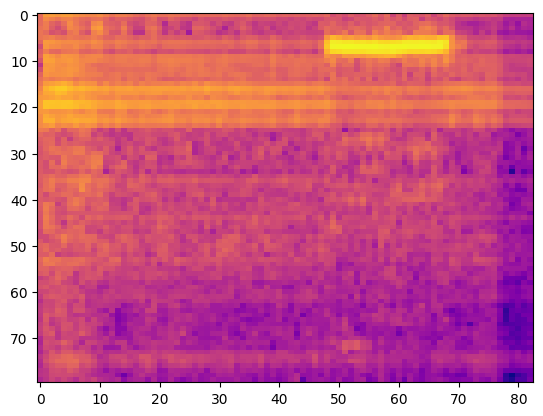

C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_2248\248094261.py:9: FutureWarning: Pass y=[ 0.00252922  0.00245506  0.00076969 ... -0.00359504 -0.00439389
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel2 = librosa.feature.melspectrogram(audio2, sr=sample_rate2, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)


(80, 83)


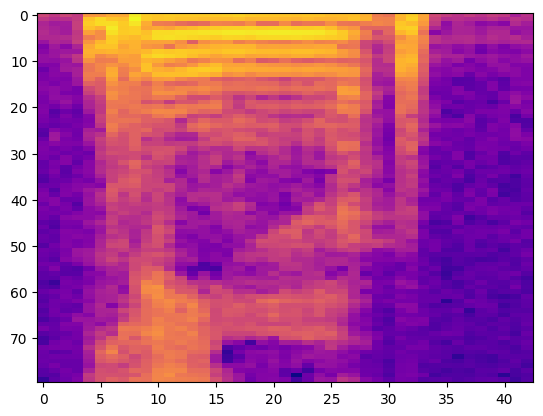

(80, 43)


C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_2248\248094261.py:14: FutureWarning: Pass y=[-1.0474415e-06 -1.6940883e-06  8.5067046e-07 ... -3.7228435e-03
 -4.2176563e-03 -6.0332036e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel3 = librosa.feature.melspectrogram(audio3, sr=sample_rate3, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)


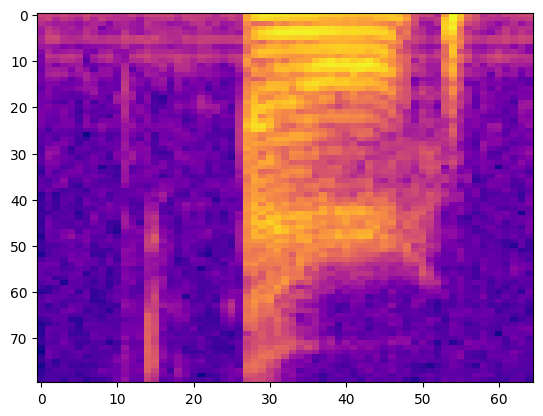

(80, 65)


C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_2248\248094261.py:19: FutureWarning: Pass y=[ 1.1200821e-06 -2.4060316e-07  9.2569189e-07 ...  2.6551373e-03
  3.0933188e-03  3.0658604e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel4 = librosa.feature.melspectrogram(


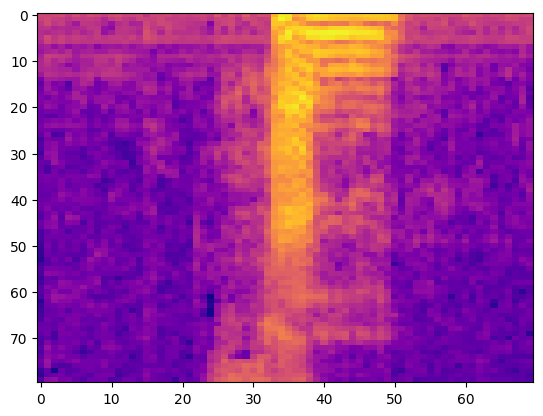

(80, 70)


In [117]:
# mel-spectrograms
import matplotlib.cm as cm

mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel1.shape)

mel2 = librosa.feature.melspectrogram(audio2, sr=sample_rate2, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel2 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel2.shape)

mel3 = librosa.feature.melspectrogram(audio3, sr=sample_rate3, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel3 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel3.shape)

mel4 = librosa.feature.melspectrogram(
    audio4, sr=sample_rate4, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel4 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel4.shape)

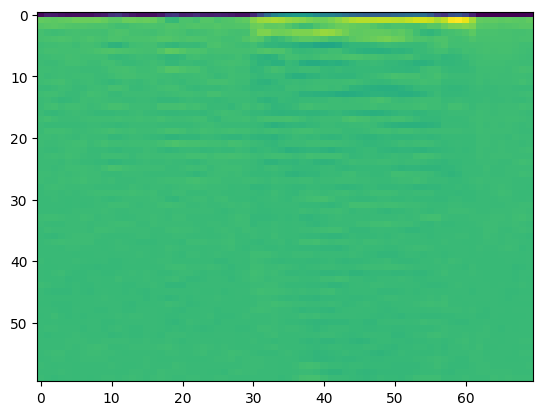

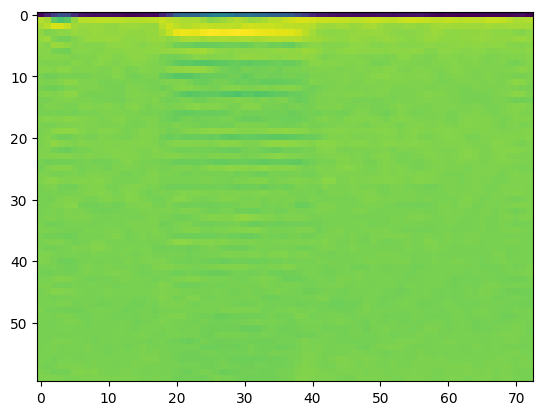

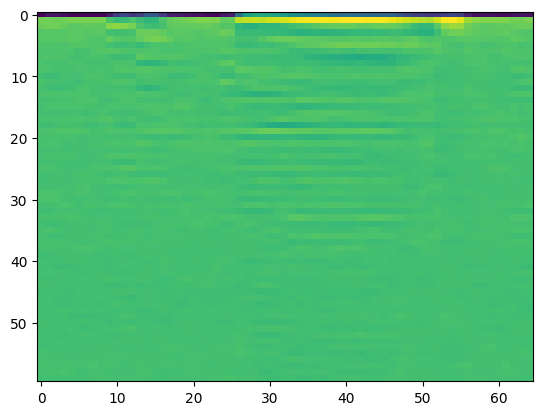

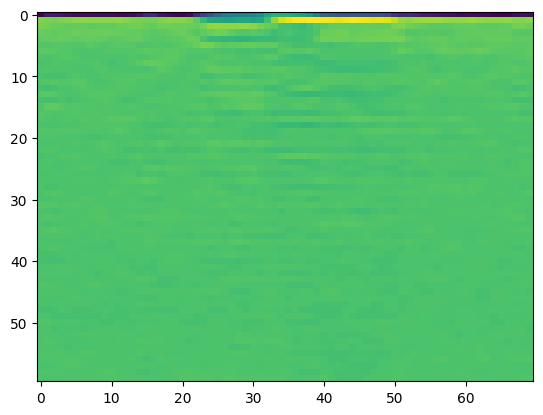

(60, 70)


In [7]:
# MFCC

mfcc = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio3, sr=sample_rate3, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio4, sr=sample_rate4, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()
print(mfcc.shape)


C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_27952\2084915794.py:3: FutureWarning: Pass y=[ 1.1492901e-04 -7.7167417e-05  3.8728963e-06 ... -4.4540344e-03
 -4.0211510e-03 -4.4739279e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)


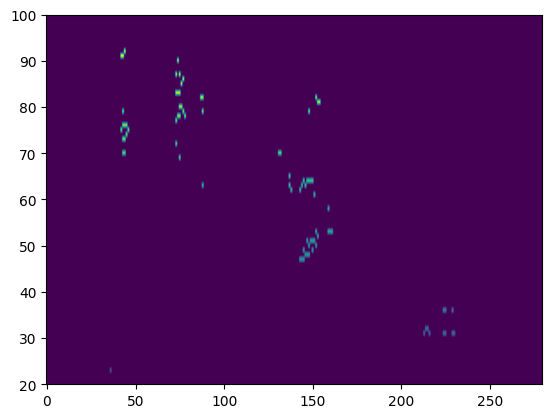

C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_27952\2084915794.py:8: FutureWarning: Pass y=[6.5103086e-05 1.5230499e-04 2.8187500e-05 ... 9.1619598e-04 1.0991800e-03
 1.0195939e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio2[0:sample_rate2*2], sr=sample_rate2, n_fft=512)


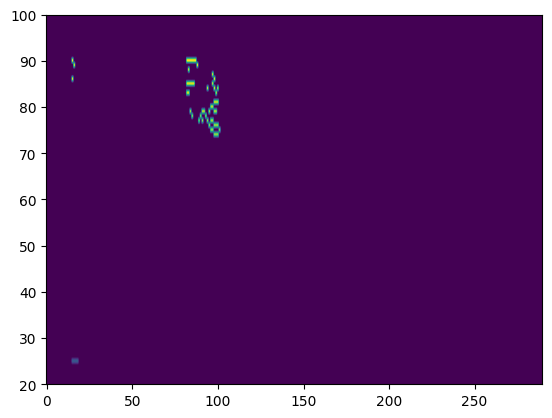

C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_27952\2084915794.py:13: FutureWarning: Pass y=[-1.0474415e-06 -1.6940883e-06  8.5067046e-07 ... -3.7228435e-03
 -4.2176563e-03 -6.0332036e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio3[0:sample_rate3*2], sr=sample_rate3, n_fft=512)


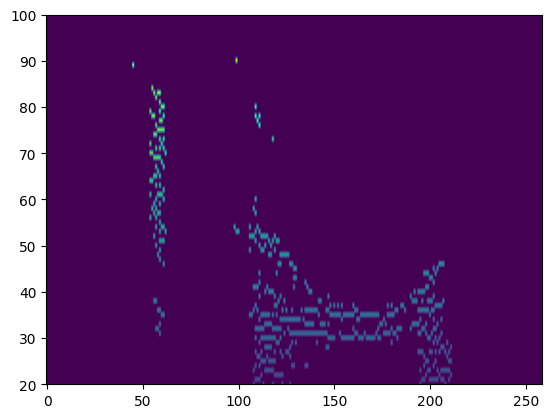

C:\Users\DawidMigowskis184819\AppData\Local\Temp\ipykernel_27952\2084915794.py:18: FutureWarning: Pass y=[ 1.1200821e-06 -2.4060316e-07  9.2569189e-07 ...  2.6551373e-03
  3.0933188e-03  3.0658604e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  pitch, mag = librosa.core.piptrack(audio4[0:sample_rate4*2], sr=sample_rate4, n_fft=512)


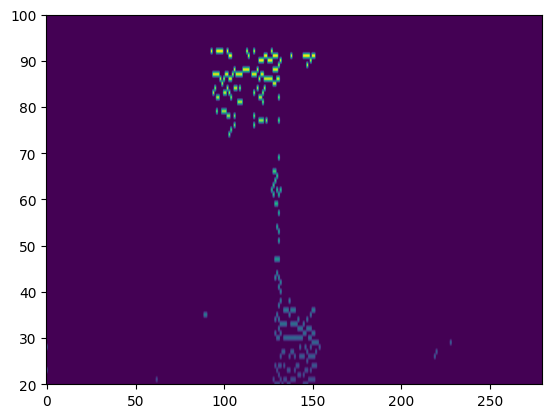

In [8]:
# Pitch

pitch, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio2[0:sample_rate2*2], sr=sample_rate2, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio3[0:sample_rate3*2], sr=sample_rate3, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio4[0:sample_rate4*2], sr=sample_rate4, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

# Preprocess

In [1]:
import pandas as pd

# Wczytywanie pliku CSV
csv_file = 'recordings_with_tones.csv'
data = pd.read_csv(csv_file)

# Kolumny, które nas interesują
columns = ['a0t', 'a1t', 'a2t', 'a3t', 'a4t', 'a5t', 'a6t', 'a7t', 'a8t', 'a9t', 'a10t', 'a100t']

In [138]:
for index, row in data.iterrows():
    file_id = row['id']
    for column in columns:
        if pd.notnull(row[column]) and row[column] != 0:
            input_path = f'recordings/stageI/{file_id}/{column[:2]}.mp3'
            file_path = f'recordings/stageI/{file_id}/{column[:2]}_preprocessed.mp3'
            if os.path.exists(input_path):
                remove_silence(input_path, file_path)
            else:
                print("brak_nagrania: " + input_path)

brak_nagrania: recordings/stageI/367/a1.mp3
brak_nagrania: recordings/stageI/367/a1.mp3
brak_nagrania: recordings/stageI/375/a1.mp3


# Save as npy

In [5]:
import keras

# Listy na cechy i etykiety
mfccs = []
labels = []

def mp3tomfcc(file_path, max_pad):
  try:
    audio, sample_rate = librosa.core.load(file_path)
  except:
    raise FileNotFoundError
  mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=60)
  pad_width = max_pad - mfcc.shape[1]
  if(pad_width < 0):
      raise ValueError
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  return mfcc

# Iteracja po wierszach w pliku CSV

for index, row in data.iterrows():
    file_id = row['id']
    for column in columns:
        if(row[column] == '0'):
            print("0")
            continue
        if pd.notnull(row[column]) and row[column] != 0:
            file_path = f'recordings/stageI/{file_id}/{column[:2]}_preprocessed.mp3'
            if os.path.exists(file_path):
                try:
                    features = mp3tomfcc(file_path, 60)
                except FileNotFoundError:
                    print("Corrupted file: "+ file_path)
                    continue
                except ValueError:
                    print("pad < 0: " + file_path)
                    continue
                mfccs.append(features)
                labels.append(row[column]-1)

# Konwersja list do numpy arrays
mfccs = np.asarray(mfccs)
print(mfccs.shape)
np.save('Data/mfccs_without_0_preprocessed_v6.npy', mfccs)

labels = keras.utils.to_categorical(labels, num_classes=4)
print(labels.shape)
np.save('Data/labels_without_0_preprocessed_v6.npy', labels)

pad < 0: recordings/stageI/8/a2_preprocessed.mp3
pad < 0: recordings/stageI/8/a4_preprocessed.mp3
pad < 0: recordings/stageI/8/a8_preprocessed.mp3
pad < 0: recordings/stageI/9/a0_preprocessed.mp3
pad < 0: recordings/stageI/9/a1_preprocessed.mp3
pad < 0: recordings/stageI/9/a2_preprocessed.mp3
pad < 0: recordings/stageI/9/a3_preprocessed.mp3
pad < 0: recordings/stageI/9/a4_preprocessed.mp3
pad < 0: recordings/stageI/9/a6_preprocessed.mp3
pad < 0: recordings/stageI/9/a7_preprocessed.mp3
pad < 0: recordings/stageI/9/a8_preprocessed.mp3
pad < 0: recordings/stageI/9/a9_preprocessed.mp3
pad < 0: recordings/stageI/9/a1_preprocessed.mp3
pad < 0: recordings/stageI/9/a1_preprocessed.mp3
pad < 0: recordings/stageI/37/a0_preprocessed.mp3
pad < 0: recordings/stageI/37/a2_preprocessed.mp3
pad < 0: recordings/stageI/37/a9_preprocessed.mp3
pad < 0: recordings/stageI/80/a0_preprocessed.mp3
pad < 0: recordings/stageI/80/a4_preprocessed.mp3
pad < 0: recordings/stageI/80/a6_preprocessed.mp3
pad < 0: recor